##iPython Notebook to explore ATM waveform characterization

Author: Alek Petty   
Date: Sep 15th 2017   
Aim: Explore different methods of waveform classification   
Notes: Using new preliminary ATM waveform data
ATM waveform readers provided courtesy of M. Linkswiler (see the atmFuncs script)

In [14]:
# Import libraries
import sys, os, glob, h5py, time
import numpy as np
from pylab import *
from scipy.optimize import curve_fit
import atmFuncs as aF
%matplotlib inline 

In [15]:
# Account for the fact that python begins indexing at 0, but HDF5 file starts indexing at 1
index_base = 1

filename='../Data/ILATM1B_20170309_133117.atm6AT6.snippet.h5'
# Open HDF5 file for reading
f = h5py.File(filename, 'r')

# Print contents of HDF5 file
printContents=0
if (printContents==1):
    print '\n{0}\nContents of {1}:\n{0}'.format('='*50, filename)
    f.visititems(printContents) # method to iterate through each item in the HDF5 file and calls "printContents" func on each
    print

waveforms_x, waveforms_y, num_gates = aF.getWaveform(f)
#waveforms_x.shape
# To access the waveform from the first laser shot:
#waveforms_y[0] # list containing a list of amplitude values (one sublist for each gate in the waveform)
#waveforms_x[0] # list containing a list of digitizer sample positions (one sublist for each gate in the waveform)

In [16]:
outputGates=0
if (outputGates>0):
    # This snippet will output the waveform gates from the first 20 laser shots to the screen
    for w,wfy in enumerate(waveforms_y): # loop through waveforms
        print
        for g,wf in enumerate(wfy): # loop through gates in waveform
            print 'Waveform {}, Gate {} ({} samples)'.format(w+index_base, g+index_base, len(wf))
            print wf
        if w > outputGates:
            break

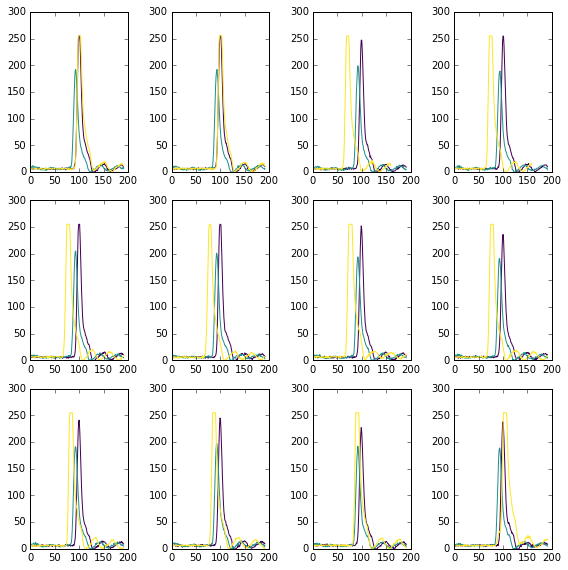

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(8, 8))
cmap = cm.viridis  
i=0
for ax in axs.flatten():
	#print ax
	sca(ax)
	c_colors = cmap(np.linspace(0, 1, num_gates[i]))
	for x in xrange(num_gates[i]):
		plot(waveforms_y[i][x], color=c_colors[x])
		#plot(waveforms_y[i][1], color='r')
	i+=1
plt.tight_layout()
plt.show()
#savefig('../Figures/testWaveform.jpg')

In [18]:
waveForm = waveforms_y[0][0]

Fitted mean =  4.77008837733
Fitted standard deviation =  4.54409529629


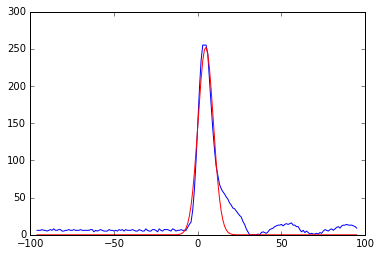

In [19]:
# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 0., 1.]

xpts=np.arange(size(waveForm))-size(waveForm)/2
coeffW, var_matrixW = curve_fit(gauss, xpts, array(waveForm), p0=p0)

# Get the fitted curve
curveFit = gauss(xpts, *coeffW)

plot(xpts, array(waveForm), label='Test data', color='b')
plot(xpts, curveFit, label='Fitted data', color='r')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print 'Fitted mean = ', coeffW[1]
print 'Fitted standard deviation = ', coeffW[2]

plt.show()
